In [1]:
import os, sys, inspect

In [2]:
cmd_folder = os.path.realpath(os.path.abspath(os.path.split(inspect.getfile(inspect.currentframe()))[0]))

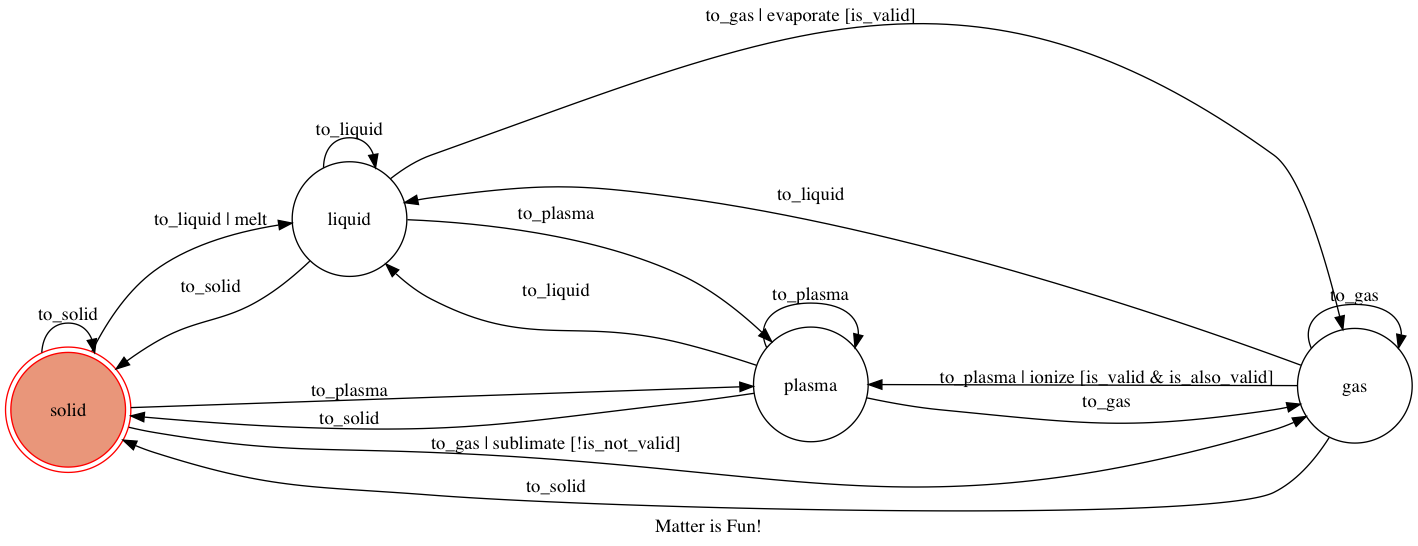

In [4]:
if cmd_folder not in sys.path:
    sys.path.insert(0, cmd_folder)
    
from transitions import *
from transitions.extensions import GraphMachine
from IPython.display import Image, display, display_png

class Matter(object):
    def is_valid(self):
        return False
    def is_not_valid(self):
        return False
    def is_also_valid(self):
        return True
    def show_graph(self, **kwargs):
        self.get_graph(**kwargs).draw('state.png', prog='dot')
        display(Image('state.png'))
transitions = [
    {'trigger':'melt', 'source':'solid', 'dest':'liquid'},
    {'trigger':'evaporate', 'source':'liquid', 'dest':'gas', 'conditions':'is_valid'},
    {'trigger':'sublimate', 'source':'solid', 'dest':'gas','unless':'is_not_valid'},
    {'trigger':'ionize', 'source':'gas', 'dest':'plasma',
    'conditions':['is_valid','is_also_valid']}
]
states =['solid','liquid','gas','plasma']
model = Matter()
machine = GraphMachine(model=model,
                      states=states,
                      transitions=transitions,
                      initial='solid',
                      show_auto_transitions=True,
                      title="Matter is Fun!",
                      show_conditions=True)
model.show_graph()


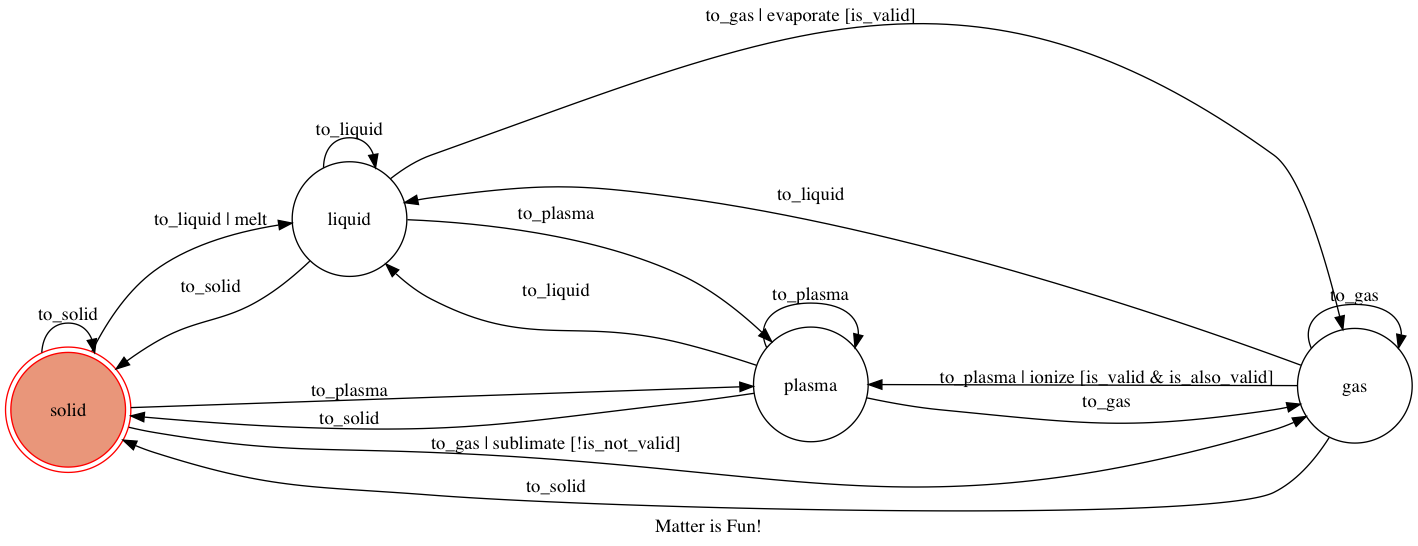

In [6]:
machine.show_auto_transitions = True
model.show_graph(force_new=True)

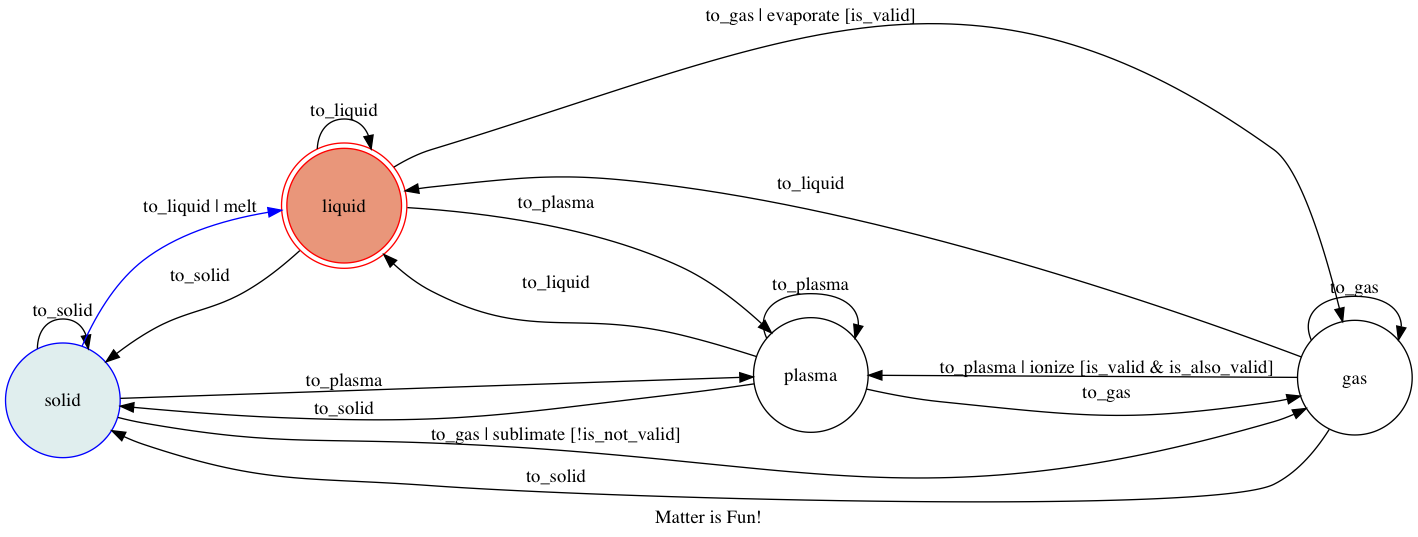

In [7]:
model.melt()
model.show_graph()